In [1]:
# reading data
import pandas as pd
# Save file
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Importing tree, Pipeline, GridSearchCV from sklearn
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import make_scorer,f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [5]:
from sklearn.inspection import permutation_importance

In [6]:
import re

In [7]:
%matplotlib inline

In [8]:
df_facility = pd.read_csv("dataset/Facilities.txt", error_bad_lines=False, delimiter= '|')
print(df_facility.shape)
df_facility.head(2)

(32, 7)


,Facility_Name,Facility_Location_Code,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,Novant Health UVA Haymarket Medical Center,216,Free Standing Emergency Room,Hospital (General),38.423916,77.401647,"15225 Heathcote Blvd, Haymarket, Virginia, 201..."
1,Kaiser Permanente - Tysons Corner - Advanced U...,700,Free Standing Emergency Room,NaN,38.929137,77.224601,"8008 Westpark Drive, McLean, Virginia, 22102, ..."


In [9]:
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Full_Address                 0
Facility_Type_Of_Facility             2
Facility_Latitude                     3
Facility_Longitude                    3
Facility_Hospital_Designation_List    7
dtype: int64

In [10]:
df_facility.Facility_Latitude.fillna(0, inplace=True)

In [11]:
df_facility.Facility_Longitude.fillna(0, inplace=True)

In [12]:
df_facility.Facility_Name.unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

#### Referred hospital description for filling missing values


|  Facility_Name  | Facility_Hospital_Designation_List | Check with partners |
| --- | --- | --- |
| Landing Zone / Non-Hospital	 | non hospital | Confirmed |
|Kaiser Permanente - Tysons Corner - Advanced U...|Hospital General | Confirmed |
|MedStar Southern Maryland Hospital Center | Hospital(General), Burns, Stroke, trauma | Confirmed|
|HCA StoneSprings Hospital Center|Hospital General | Confirmed|
|Out Of Area Hospital Not Listed	 | Hospital General  |Confirmed|

#### Feature - Facility_Hospital_Designation_List

In [13]:


df_facility.loc[ df_facility['Facility_Name'].isin(['Kaiser Permanente - Tysons Corner - Advanced Urgent Care','Kaiser Permanente - Woodbridge - Advanced Urgent Care','HCA StoneSprings Hospital Center', 'Out Of Area Hospital Not Listed']), 'Facility_Hospital_Designation_List'] = 'Hospital(General)'

In [14]:

df_facility.loc[ df_facility['Facility_Name'].isin(['Landing Zone / Non-Hospital','Landing Zone']), 'Facility_Hospital_Designation_List'] = 'Non Hospital'

In [15]:

df_facility.loc[ df_facility['Facility_Name'].isin(['MedStar Southern Maryland Hospital Center']), 'Facility_Hospital_Designation_List'] = 'Hospital(General), Burns, Stroke, trauma'

#### Feature - Facility_Type_Of_Facility

In [16]:
df_facility.Facility_Type_Of_Facility.fillna('Non hospital service', inplace=True)

In [17]:
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Type_Of_Facility             0
Facility_Hospital_Designation_List    0
Facility_Latitude                     0
Facility_Longitude                    0
Facility_Full_Address                 0
dtype: int64

In [18]:
df_facility['Facility_Name'].unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

In [19]:
df_facility['Facility_Location_Code'].unique()

array([216, 700, 107, 116, 701, 106, 386, 385, 999,  47, 363, 364, 327,
       326, 204, 324,  59,   1, 205,  16, 215, 213,  58, 374,   3, 325,
       328,  36, 102,  95, 202,  11], dtype=int64)

## Read the data

In [31]:
# Attributes of incident
incidents = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="incidents")
incidents.shape

(122532, 10)

In [32]:
# Units that responded to an incident
units = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="units")
units.shape

(284754, 12)

In [33]:
# Patient affected in the incident 
patients = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="patients")
patients.shape

(125032, 12)

In [34]:
# 
procedures = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="procedures")
procedures.shape

(128586, 4)

In [35]:
medications = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="medications")
medications.shape

(48222, 4)

## Understand empty values

In [24]:
def view_empty_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Displays the count and % of empty values in a dataframe.
    """
    res = pd.concat([df.dtypes, df.isnull().sum(), df.isnull().sum() / len(df)], axis=1)
    res.columns = ["Dtype", "Count of missing", "% of missing"]
    return res

In [37]:
view_empty_values(incidents)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
CallConfirmedDT,datetime64[ns],0,0.000000
ShiftDay,object,0,0.000000
TourOfShift,int64,0,0.000000
IncidentFirstDue,float64,14,0.000114
InitialIncidentType,object,0,0.000000
DispatchedIncidentType,object,0,0.000000
ArrivedIncidentType,object,389,0.003175
FinalIncidentType,object,0,0.000000
FinalIncidentTypeDescription,object,42,0.000343


In [38]:
# there are very few missing values in the data so we can drop these records
incidents.dropna(inplace=True)
incidents.shape

(122088, 10)

In [39]:
# are there duplicated Incidents
incidents.PrimaryKey.nunique() / len(incidents)

0.9999672367472643

In [40]:
incidents[incidents.PrimaryKey.duplicated(keep=False)].sort_values("PrimaryKey")

,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription
5681,9934140833,2018-08-10 22:51:12,C,2,414.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
5682,9934140833,2018-08-10 23:47:37,C,2,414.0,ALS,ALS,ALS,ALS,ALS EMERGENCY
64331,11194080439,2019-10-06 19:23:18,B,3,408.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
64332,11194080439,2019-10-06 18:40:09,B,3,408.0,ACCIMF,ACCIMF,ACCIMF,ACCIMF,ACCIDENT W/INJ - MEDIC REQ
67023,11244338761,2019-10-26 02:47:26,C,2,433.0,ASLTWF,ASLTWF,ASLTWF,ASLTWF,ASSAULT W/WEAPON
67024,11244338761,2019-10-26 04:05:08,C,2,433.0,MEDICAL,MEDICAL,MEDICAL,MEDICAL,MEDICAL EMERGENCY
102190,11964264456,2020-07-24 22:50:45,A,2,426.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
102191,11964264456,2020-07-24 22:15:51,A,2,426.0,ACCITF,ACCITF,ACCITF,ACCIF,ACCIDENT W/INJ


In [41]:
# Dropping these records for now
incidents.drop_duplicates(subset=["PrimaryKey"], keep=False, inplace=True)
incidents.shape

(122080, 10)

In [42]:
view_empty_values(units)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
CallConfirmedDT,datetime64[ns],0,0.000000
ResponseUnitID,object,0,0.000000
TransportUnitID,object,0,0.000000
TransportUnitLOC,object,0,0.000000
UnitPrimaryActionTaken,object,37,0.000130
UnitOtherActionsTaken,object,179609,0.630751
UnitStation,object,49,0.000172
UnitType,object,0,0.000000
UnitArrivalOrder,float64,26135,0.091781


|Column|Missing Value|%missing|Assumed meaning of missing value|
|----|----|----|----|
|UnitOtherActionsTaken|179609|63%|Combine both 'UnitPrimaryActionTaken' and 'UnitOtherActionTaken' |
|UnitStation|49|0.017%|We can drop these values|
|UnitArrivalOrder|26135|9%|No unit arrived- replace with 0|
|UnitTransportedDT|157474|55%|Unit was not transported?|
|UnitTransportedArrivalDT|158333|55%|Unit was not transported?|



|Column|Missing Value|%missing|Assumend meaning|
|----|----|----|----|
|||||
|||||
|||||
|||||

In [43]:
 # Replaced all the null values of 'UnitArrivalOrder' column with value '0' because No unit arrived
units['UnitArrivalOrder'].fillna(0, inplace = True)

In [44]:
# Replaced all the null values of 'UnitTransportedDT' column with 00:00:0 because the Unit was not transported
units['UnitTransportedDT'].fillna('00:00:0', inplace = True)

In [45]:
# Replaced all the null values of 'UnitTransportedArrivalDT' column with 00:00:0 because the Unit was not transported
units['UnitTransportedArrivalDT'].fillna('00:00:0', inplace = True)

In [46]:
# Replaced all the null values of 'UnitOtherActionsTaken' column with 'No other action taken' because the no other action was taken
units['UnitOtherActionsTaken'].fillna('No other action taken', inplace = True)

In [47]:
# Replaced all the null values of 'UnitPrimaryActionTaken' column with 'No other action taken' because the no  action was taken
units['UnitPrimaryActionTaken'].fillna('No action taken', inplace = True)

In [48]:
# Dropping remaning empty values
print(units.shape)
units.dropna(inplace=True)
units.shape

(284754, 12)


(284705, 12)

In [49]:
view_empty_values(units)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.0
CallConfirmedDT,datetime64[ns],0,0.0
ResponseUnitID,object,0,0.0
TransportUnitID,object,0,0.0
TransportUnitLOC,object,0,0.0
UnitPrimaryActionTaken,object,0,0.0
UnitOtherActionsTaken,object,0,0.0
UnitStation,object,0,0.0
UnitType,object,0,0.0
UnitArrivalOrder,float64,0,0.0


**Q: What is unique key for units?**  
**Q: Logic for missing value in units? Do we need to add anew column to indicate that unit was not transported?**

In [50]:
# Replaced all the null values of 'TransportHospitalName' column with 'No Hospital service'
patients['TransportHospitalCode'].fillna('No Hospital service', inplace = True)

In [51]:
## Replaced all the null values of 'TransportHospitalCode' column with 'No Hospital name'
patients['TransportHospitalName'].fillna('No Hospital name', inplace = True)

In [52]:
# Replaced all the null values of 'ReasonForChoosingHospital' column with 'No Hospital service'
patients['ReasonForChoosingHospital'].fillna('No Hospital service', inplace = True)

In [53]:
# Replaced all the null values of 'TransportLOC' column with '0'
patients['TransportLOC'].fillna('0', inplace = True)

In [54]:
view_empty_values(patients)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
CallConfirmedDT,datetime64[ns],0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
TransportLOC,object,0,0.000000
TransportHospitalCode,object,0,0.000000
TransportHospitalName,object,0,0.000000
ReasonForChoosingHospital,object,0,0.000000
PatientAge,object,2,0.000016
PrimaryImpression,object,3,0.000024


In [55]:
# Dropping remaning empty values
print(patients.shape)
patients.dropna(inplace=True)
patients.shape

(125032, 12)


(125028, 12)

In [56]:
view_empty_values(procedures)

,Dtype,Count of missing,% of missing
PatientID,int64,0,0.0
ProcedurePrimaryKey,int64,0,0.0
ProcedurePerformed,object,0,0.0
isALS_LOC,int64,0,0.0


In [57]:
# Replaced all the null values of 'MedicationGiven' column with 'No medication given'
medications['MedicationGiven'].fillna('No medication given', inplace = True)

In [58]:
view_empty_values(medications)

,Dtype,Count of missing,% of missing
PatientID,int64,0,0.0
MedicationPrimaryKey,int64,0,0.0
MedicationGiven,object,0,0.0
isALS_LOC,int64,0,0.0


In [60]:
# Save cleaned data to file
writer = ExcelWriter("dataset/IndividualTablesCleaned.xlsx")
incidents.to_excel(writer, "incidents", index=False)
units.to_excel(writer, "units", index=False)
patients.to_excel(writer, "patients", index=False)
procedures.to_excel(writer, "procedures", index=False)
medications.to_excel(writer, "medications", index=False)
writer.save()

## Merging datasets
Examples of how to merge different datasets

In [206]:
# An incident can have multiple units respond
print(incidents.shape, units.shape)
t = incidents.merge(units, how="left", on="PrimaryKey")
t.shape

(122080, 10) (284705, 12)


(283972, 21)

In [207]:
# An incident can have multiple patients
print(incidents.shape, patients.shape)
t = incidents.merge(patients, how="left", on="PrimaryKey")
t.shape

(122080, 10) (125028, 12)


(124580, 21)

In [208]:
# Join incident, patient and untis
t1  = incidents.merge(units, how="left", on="PrimaryKey")
t1.shape

(283972, 21)

In [209]:
# A patient can undergo multiple/no procedure
print(patients.shape, procedures.shape)
t = patients.merge(procedures, how="left", on="PatientID")
t.shape

(125028, 12) (128586, 4)


(188017, 15)

In [210]:
# A patient can be given multiple/no medications
print(patients.shape, medications.shape)
t = patients.merge(medications, how="left", on="PatientID")
t.shape

(125028, 12) (48222, 4)


(144433, 15)

In [211]:
sorted(medications.MedicationGiven[medications.MedicationGiven.notnull()].unique())

['Acetylsalicylic Acid (Aspirin, ASA) ',
 'Adenosine (Adenocard)',
 'Albuterol (Ventolin) ',
 'Amiodarone (Cordarone)',
 'Atropine (Atropine Sulfate) ',
 'Calcium Chloride (10%) ',
 'Cyanokit (Hydroxocobalamin)',
 'Dextrose 10 % (D10)',
 'Dextrose 50 % (D50)',
 'Diazepam (Valium)',
 'Diphenhydramine (Benadryl)',
 'Epinephrine 0.1 MG/ML (1:10,000)',
 'Epinephrine 1 MG/ML (1:1,000)',
 'Fentanyl Citrate (Sublimaze) ',
 'Glucagon (Glucagen)',
 'Glucose (Oral)',
 'Ipratropium Bromide(Atrovent)',
 'Ketamine (Ketalar)',
 'Lidocaine (2%) (Xylocaine) ',
 'Magnesium Sulfate (50%) ',
 'Methylprednisolone (Solu-Medrol) ',
 'Midazolam (Versed)',
 'Morphine (Morphine Sulfate) ',
 'Naloxone (Narcan)',
 'Nitroglycerin',
 'No medication given',
 'Norepinephrine (Levophed)',
 'Normal saline',
 'Ondansetron (Zofran)',
 'Oxygen',
 'Sodium Bicarbonate (8.4%) ',
 'Tetracaine',
 'Tranexamic Acid (TXA)']

In [212]:
procedures.ProcedurePerformed.nunique(), medications.MedicationGiven.nunique()

(68, 33)

In [213]:
## Ideas for Model
# Model 1: What medication/procedure to be followed for an incident?  
# Model 2: Where should a patient be taken after incident?

### Model for week 13- Full Sprint 4 - code starts here

In [10]:
# Read cleaned data
incidents = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="incidents")
units = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="units")
patients = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="patients")
procedures = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="procedures")
medications = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="medications")

In [184]:
#Merge patients with the units - Units 0:many patients
print(patients.shape, units.shape)
patientunitsmerge = patients.merge(units, how="left", on=["PrimaryKey", "TransportUnitID"])
patientunitsmerge.shape

(125028, 12) (284705, 12)


(288314, 22)

In [185]:
print(patientunitsmerge.shape, incidents.shape)
incidentpatientunitsmerge = patientunitsmerge.merge(incidents, how="left", on="PrimaryKey")
incidentpatientunitsmerge.shape

(288314, 22) (122080, 10)


(288314, 31)

In [186]:
incidentpatientunitsmerge['TransportHospitalCode'].unique()

array([3, 16, 95, 11, 1, 47, 103, 'No Hospital service', 36, 215, 213,
       205, 202, 102, 325, 999, 58, 328, 204, 327, 326, 324, 59, 364, 363,
       374, 116, 216, 107, 700, 701], dtype=object)

In [187]:
incidentpatientunitsmerge.loc[incidentpatientunitsmerge['TransportHospitalCode'] == 'No Hospital service', 'TransportHospitalCode'] = 111
incidentpatientunitsmerge['TransportHospitalCode'] = incidentpatientunitsmerge['TransportHospitalCode'].astype(int)

In [188]:
print(incidentpatientunitsmerge.shape, df_facility.shape)
incidentpatientunitsfacilitiesmerge = incidentpatientunitsmerge.merge(df_facility, how="left", left_on="TransportHospitalCode" , right_on="Facility_Location_Code")
incidentpatientunitsfacilitiesmerge.shape

(288314, 31) (32, 7)


(288314, 38)

In [189]:
#Drop 'TransportHospitalCode'
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['Facility_Location_Code'])

In [190]:
incidentpatientunitsfacilitiesmerge.head(15)

,PrimaryKey,CallConfirmedDT_x,PatientID,TransportUnitID,TransportLOC,TransportHospitalCode,TransportHospitalName,ReasonForChoosingHospital,PatientAge,PrimaryImpression,...,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,Facility_Name,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,9804015371,2018-07-01 02:16:24,640838,M401,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
1,9804015371,2018-07-01 02:16:24,640838,M401,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
2,9804016046,2018-07-01 11:20:51,641032,M401,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,Patient's Choice,80 - 89,EENT - Eye Pain (Non-traumatic) (H57.10),...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
3,9804018610,2018-07-02 09:31:06,641839,M401,Level 4: 1 Provider (BLS Care),16,Fairfax Hospital,Closest Facility,40 - 49,Injury - Foot (S99.92),...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
4,9804018610,2018-07-02 09:31:06,641839,M401,Level 4: 1 Provider (BLS Care),16,Fairfax Hospital,Closest Facility,40 - 49,Injury - Foot (S99.92),...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
5,9804018946,2018-07-02 11:19:56,641959,M401,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,"Closest Facility,Family Choice,Patient's Physi...",80 - 89,Injury - Hip (S79.91),...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
6,9804018946,2018-07-02 11:19:56,641959,M401,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,"Closest Facility,Family Choice,Patient's Physi...",80 - 89,Injury - Hip (S79.91),...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
7,9804019337,2018-07-02 13:56:15,642086,M401,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Closest Facility,Patient's Physician's Choice",20 - 29,Neuro - Altered Mental Status / Level of Consc...,...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
8,9804019337,2018-07-02 13:56:15,642086,M401,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Closest Facility,Patient's Physician's Choice",20 - 29,Neuro - Altered Mental Status / Level of Consc...,...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
9,9804019821,2018-07-02 16:27:31,642222,M401,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Closest Facility,Patient's Choice",90 - 99,Injury - Hip (S79.91),...,BLS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"

In [191]:
# Categorical data types
incidentpatientunitsfacilitiesmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns

Index(['TransportUnitID', 'TransportLOC', 'TransportHospitalName',
       'ReasonForChoosingHospital', 'PatientAge', 'PrimaryImpression',
       'SecondaryImpression', 'PatientDisposition', 'ResponseUnitID',
       'TransportUnitLOC', 'UnitPrimaryActionTaken', 'UnitOtherActionsTaken',
       'UnitStation', 'UnitType', 'UnitTransportedDT',
       'UnitTransportedArrivalDT', 'ShiftDay', 'InitialIncidentType',
       'DispatchedIncidentType', 'ArrivedIncidentType', 'FinalIncidentType',
       'FinalIncidentTypeDescription', 'Facility_Name',
       'Facility_Type_Of_Facility', 'Facility_Hospital_Designation_List',
       'Facility_Full_Address'],
      dtype='object')

In [192]:
# 
incidentpatientunitsfacilitiesmerge.TransportUnitLOC.nunique()

4

In [193]:
view_empty_values(incidentpatientunitsfacilitiesmerge)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
CallConfirmedDT_x,datetime64[ns],0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
TransportLOC,object,0,0.000000
TransportHospitalCode,int32,0,0.000000
TransportHospitalName,object,0,0.000000
ReasonForChoosingHospital,object,0,0.000000
PatientAge,object,0,0.000000
PrimaryImpression,object,0,0.000000


In [194]:
# TourOfShift: is categorical so converting it to string
incidentpatientunitsfacilitiesmerge["TourOfShift"] = incidentpatientunitsfacilitiesmerge.TourOfShift.astype(str)

In [195]:
# IncidentFirstDue is within or outside fairfax so converting it to dummy
incidentpatientunitsfacilitiesmerge.IncidentFirstDue.fillna(0, inplace=True)
# df.loc[df['First season'] > 1990, 'First Season'] = 1
incidentpatientunitsfacilitiesmerge.loc[incidentpatientunitsfacilitiesmerge.IncidentFirstDue != 0, "IncidentFirstDue"] =1

In [196]:
incidentpatientunitsfacilitiesmerge.dropna(inplace=True)
incidentpatientunitsfacilitiesmerge.shape

(283450, 37)

####  Model 7 - using Random Forest by removing top 3 influential features


In [197]:
# InitialIncidentType	DispatchedIncidentType	ArrivedIncidentType	FinalIncidentType	FinalIncidentTypeDescription
# Highly corelated features - keeping only one makes sense
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ["Facility_Latitude","Facility_Longitude","InitialIncidentType","DispatchedIncidentType","ArrivedIncidentType","FinalIncidentTypeDescription" ])

In [198]:
# Nominal values with large variance, like dates
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['UnitTransportedDT', 'UnitTransportedArrivalDT','UnitOtherActionsTaken','SecondaryImpression'])

In [199]:
# Its correlated to 'TransportUnitID_y'
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['ResponseUnitID'])

In [200]:
# Not an important feature for prediction
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['TransportHospitalName'])

In [201]:
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['PrimaryKey', 'CallConfirmedDT', 'CallConfirmedDT_x', 'CallConfirmedDT_y'])

In [202]:
incidentpatientunitsfacilitiesmerge.FinalIncidentType.unique()

array(['ALS', 'BLS', 'ODF', 'ACCITF', 'SHOTF', 'ACCIF', 'CPRF', 'ACCIMF',
       'ACCIHF', 'AMED', 'STABF', 'SUIAF', 'FBLDG', 'CAVEIN', 'FACCIF',
       'PSERVF', 'FOUT', 'FTH', 'GFRESCUE', 'DROWNF', 'FHIRIS', 'RTRAP',
       'ACCIBF', 'FGAPT', 'RSWIFT', 'GASIN', 'FVEHF', 'CODE1', 'ELEV',
       'RWATER', 'INVF', 'SIG1F', 'FDACCITF', 'ASLTWF', 'FHOU', 'RESCUE',
       'ALRMFD', 'FDACCIF', 'EMETROF', 'STILALRM', 'ECOD', 'HAZMAT',
       'FDACCF', 'MEDICAL', 'FTRKF', 'FDACCIMF', 'RIVERF', 'LOCKF'],
      dtype=object)

In [203]:
# 
incidentpatientunitsfacilitiesmerge.ShiftDay.unique()

array(['B', 'A', 'C'], dtype=object)

In [204]:
# mapping 'PRV' to 111, Drop TA only few values
incidentpatientunitsfacilitiesmerge.UnitStation.unique()

array([1, 2, 34, 4, 31, 36, 5, 37, 11, 22, 26, 35, 8, 30, 10, 14, 18, 9,
       24, 28, 12, 39, 13, 29, 41, 32, 27, 23, 15, 21, 40, 17, 25, 16, 38,
       19, 20, 42, 'PRV', 33, 3, 'TA'], dtype=object)

In [208]:
# 
incidentpatientunitsfacilitiesmerge.UnitType.unique()

array(['Engine', 'Medic', 'Rescue Squad', 'EMS Supervisor', 'Truck',
       'Battalion Chief', 'Safety Officer', 'Hazmat', 'Engine ',
       'Volunteer Chief', 'Investigator', 'Light and Air Unit',
       'Ambulance', 'Technical Rescue', 'Tanker', 'Inflatable Boat',
       'Swift Water', 'Ultra Terrain Vehicle', 'Boat Support',
       'Hazmat Support Unit', 'Utility', 'Brush', 'Foam Engine',
       'Rescue Engine', 'Lab', 'SHRU', 'Fire Marshal', 'Command Aide',
       'Bariatric Unit', 'Foam Unit', 'Fire Boat'], dtype=object)

In [209]:
# 
incidentpatientunitsmerge.TransportUnitLOC.unique()

array(['ALS-Paramedic', 'BLS-EMT/EMT-Basic', 'ALS-Intermediate',
       'ALS-Physician'], dtype=object)

In [210]:
incidentpatientunitsmerge.TransportUnitID.unique()

array(['M401', 'M402', 'M434', 'M404', 'M436', 'M405', 'M437', 'M426',
       'M408', 'M408B', 'M430', 'M410B', 'M409B', 'M409', 'M424', 'M410',
       'M428', 'M411B', 'M411', 'M412', 'M439', 'M413', 'M441', 'M432',
       'M414', 'M427', 'M423', 'E415', 'M415', 'M421', 'M417', 'M416',
       'M438', 'M418', 'M419', 'M420', 'M422', 'M440', 'M435', 'M425',
       'M429', 'M442', 'M431', 'M401E', 'E401', 'A410E', 'M412E', 'A422E',
       'A402E', 'M422B', 'EMS403', 'R418', 'A414E', 'A421E', 'E411',
       'E439', 'A414', 'E418', 'E442', 'M405E', 'A402', 'E440', 'A438E',
       'R411', 'TL436', 'M417E', 'A405E', 'E430', 'E423', 'TL440', 'E409',
       'A413E', 'E402B', 'TL401', 'A417E', 'M414E', 'E428', 'R439',
       'A401E', 'A417', 'HM440', 'R401', 'E405', 'A422', 'TL405', 'E417',
       'M422E', 'A437E', 'R421', 'E402', 'E413', 'A410', 'E404', 'E421',
       'E410', 'A401', 'A408E', 'M402B', 'A412E', 'E436', 'E432', 'T411',
       'E434', 'E437', 'E438', 'TT430', 'E429', 'E420', 'R42

In [211]:
# keep only numbers in TransportUnitID
incidentpatientunitsfacilitiesmerge['TransportUnitID']  = incidentpatientunitsfacilitiesmerge['TransportUnitID'] .apply(lambda row: re.sub("[^0-9]", "", row))

In [212]:
incidentpatientunitsfacilitiesmerge.TransportUnitID.unique()

array(['401', '402', '434', '404', '436', '405', '437', '426', '408',
       '430', '410', '409', '424', '428', '411', '412', '439', '413',
       '441', '432', '414', '427', '423', '415', '421', '417', '416',
       '438', '418', '419', '420', '422', '440', '435', '425', '429',
       '442', '431'], dtype=object)

In [213]:
incidentpatientunitsfacilitiesmerge['TransportHospitalCode'].unique()

array([  3,  16,  95,  11,   1,  47,  36, 213, 205, 202, 325,  58, 328,
       204, 327, 326, 324,  59, 364, 374, 116, 216])

In [214]:
incidentpatientunitsfacilitiesmerge.loc[incidentpatientunitsfacilitiesmerge['TransportHospitalCode'] == 'No Hospital service', 'TransportHospitalCode'] = 111
# incidentpatientunitsfacilitiesmerge['TransportHospitalCode'] = incidentpatientunitsfacilitiesmerge['TransportHospitalCode'].astype(int)

D:\Softwares\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [216]:
incidentpatientunitsfacilitiesmerge.UnitType.value_counts()

Medic                    134248
Engine                   102101
Truck                     13027
Rescue Squad              11447
EMS Supervisor            10480
Battalion Chief            3697
Safety Officer             2704
Engine                     2451
Rescue Engine               701
Hazmat                      536
Ambulance                   381
Tanker                      311
Foam Engine                 289
Investigator                275
Volunteer Chief             129
Light and Air Unit          112
Ultra Terrain Vehicle       109
Hazmat Support Unit          99
Swift Water                  88
Technical Rescue             71
Brush                        54
Command Aide                 49
Boat Support                 24
Utility                      18
Inflatable Boat              15
Bariatric Unit               12
SHRU                          9
Lab                           6
Fire Marshal                  3
Fire Boat                     2
Foam Unit                     2
Name: Un

In [218]:
# dropping features - correlated to response
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['Facility_Name','Facility_Full_Address', 'Facility_Type_Of_Facility', "Facility_Hospital_Designation_List"])

In [220]:
# Drop ID 
incidentpatientunitsfacilitiesmerge.drop(columns= ["PatientID"], inplace=True)

In [221]:
# Categorical data types
Feature_list = incidentpatientunitsfacilitiesmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns
Feature_list

Index(['TransportUnitID', 'TransportLOC', 'ReasonForChoosingHospital',
       'PatientAge', 'PrimaryImpression', 'PatientDisposition',
       'TransportUnitLOC', 'UnitPrimaryActionTaken', 'UnitStation', 'UnitType',
       'ShiftDay', 'TourOfShift', 'FinalIncidentType'],
      dtype='object')

In [222]:
subset_dataframe_featurelist=[]
for variable in Feature_list:
    subset_dataframe_featurelist.append(pd.get_dummies(incidentpatientunitsfacilitiesmerge[variable],prefix=variable, dummy_na=False))

In [223]:
merged_subset_dataframe_featurelist = pd.concat(subset_dataframe_featurelist, axis=1)
merged_subset_dataframe_featurelist.shape

(283450, 714)

In [224]:
%%time
incidentpatientunitsmerged = pd.concat([merged_subset_dataframe_featurelist, incidentpatientunitsfacilitiesmerge], axis=1)
incidentpatientunitsmerged.shape

Wall time: 222 ms


(283450, 730)

In [225]:
# Drop nominal features already converted in numerical features using get_dummies
incidentpatientunitsmerged.drop(Feature_list, axis=1, inplace=True)
incidentpatientunitsmerged.shape

(283450, 717)

In [226]:
incidentpatientunitsmerged.head(5)

,TransportUnitID_401,TransportUnitID_402,TransportUnitID_404,TransportUnitID_405,TransportUnitID_408,TransportUnitID_409,TransportUnitID_410,TransportUnitID_411,TransportUnitID_412,TransportUnitID_413,...,FinalIncidentType_RTRAP,FinalIncidentType_RWATER,FinalIncidentType_SHOTF,FinalIncidentType_SIG1F,FinalIncidentType_STABF,FinalIncidentType_STILALRM,FinalIncidentType_SUIAF,TransportHospitalCode,UnitArrivalOrder,IncidentFirstDue
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2,1.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,1,1.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,2,1.0


In [227]:
X= incidentpatientunitsmerged.drop(columns = ['TransportHospitalCode'])
X.shape

(283450, 716)

In [228]:
y = pd.to_numeric(incidentpatientunitsmerged['TransportHospitalCode'])

In [229]:
X.shape, y.shape

((283450, 716), (283450,))

In [230]:
# remove weird charachters in column names: https://stackoverflow.com/a/62364946/5977874
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X.drop(columns="UnitType_Engine", inplace=True) # becomes duplicated

In [231]:
# Using train_test_split() to randomly split the given training dataset into training and test
# data by 70:30 percent ratio respectively. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.shape,X_test.shape)

(198415, 714) (85035, 714)


In [239]:
clfRandom_2 = RandomForestClassifier(bootstrap=True, random_state=0, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, verbose=0,
            warm_start=False)

In [240]:
pipe = Pipeline([
    ('rf', clfRandom_2)
])

In [241]:
parameters = {
    'rf__n_estimators': [10,25],
    'rf__max_depth': [5,15]
    
}

In [242]:

clf_GS_Model_RF2_1 = GridSearchCV(pipe, parameters, scoring=make_scorer(f1_score, average='weighted'))

In [243]:
%time clf_GS_Model_RF2_1.fit(X_train, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 1min 54s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [244]:
pd.DataFrame(clf_GS_Model_RF2_1.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,9.216295,0.088850,0.444551,0.006648,15,25,"{'rf__max_depth': 15, 'rf__n_estimators': 25}",0.614688,0.641090,0.641221,0.639310,0.628930,0.633048,0.010244,1
2,4.333713,0.034476,0.279235,0.007882,15,10,"{'rf__max_depth': 15, 'rf__n_estimators': 10}",0.602141,0.649968,0.619419,0.628711,0.645240,0.629096,0.017416,2
0,1.986255,0.036353,0.244863,0.007346,5,10,"{'rf__max_depth': 5, 'rf__n_estimators': 10}",0.379695,0.415202,0.399668,0.362834,0.347505,0.380981,0.024380,3
1,3.756241,0.030608,0.376380,0.017819,5,25,"{'rf__max_depth': 5, 'rf__n_estimators': 25}",0.400390,0.420874,0.358504,0.323496,0.328124,0.366278,0.038706,4


In [245]:
# Viewing The Best Parameters
print('Best n estimator:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__n_estimators'])
print('Best max_depth:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__max_depth'])
print('Best min_samples_split:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__min_samples_split'])

Best n estimator: 25
Best max_depth: 15
Best min_samples_split: 2


In [246]:
y_train_pred = clf_GS_Model_RF2_1.best_estimator_.predict(X_train)
# y_train_pred = clfRandom.predict(X_train)

f1_score(y_train, y_train_pred,average='weighted')

0.6422385352276345

In [247]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00     10485
           3       0.00      0.00      0.00      9291
          11       0.86      0.68      0.76     26677
          16       0.63      0.96      0.76     83902
          36       0.00      0.00      0.00       226
          47       0.83      0.88      0.85     23313
          58       0.00      0.00      0.00       375
          59       0.00      0.00      0.00       189
          95       0.87      0.74      0.80     28978
         116       0.00      0.00      0.00         4
         202       0.00      0.00      0.00      1148
         204       0.00      0.00      0.00       220
         205       0.00      0.00      0.00      7072
         213       1.00      0.00      0.01      4829
         216       0.00      0.00      0.00        12
         324       0.00      0.00      0.00       140
         325       0.00      0.00      0.00       427
         326       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
accuracy_score(y_train, y_train_pred)

0.710218481465615

In [254]:
y_test_pred = clf_GS_Model_RF2_1.best_estimator_.predict(X_test)
# y_cross_validation_pred= clfRandom.predict(X_cross_validation)
accuracy_score(y_test,y_test_pred), f1_score(y_test, y_test_pred, average='weighted')

(0.7062974069500794, 0.638729413740135)

In [255]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00      4462
           3       0.00      0.00      0.00      3937
          11       0.84      0.67      0.75     11431
          16       0.63      0.96      0.76     35909
          36       0.00      0.00      0.00       108
          47       0.83      0.88      0.85     10260
          58       0.00      0.00      0.00       166
          59       0.00      0.00      0.00        84
          95       0.86      0.74      0.79     12313
         116       0.00      0.00      0.00         2
         202       0.00      0.00      0.00       481
         204       0.00      0.00      0.00        94
         205       0.00      0.00      0.00      3055
         213       1.00      0.00      0.00      2012
         216       0.00      0.00      0.00         5
         324       0.00      0.00      0.00        54
         325       0.00      0.00      0.00       176
         326       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
clfRandom = clf_GS_Model_RF2_1.best_estimator_

In [257]:
clfRandom = clf_GS_Model_RF2_1.best_estimator_.get_params()["rf"]

In [258]:
%time clfRandom.fit(X_train, y_train)

Wall time: 11.3 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [259]:
y_test_pred= clfRandom.predict(X_test)

Text(0.5, 0, 'Random Forest Feature Importance')

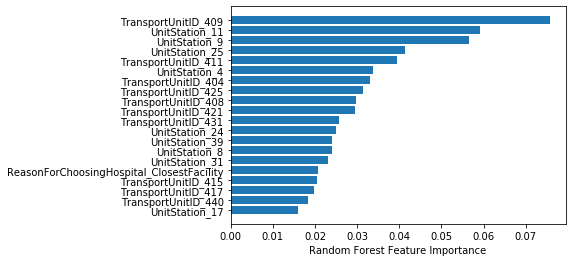

In [260]:
sorted_idx = clfRandom.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-20:]], clfRandom.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")

In [261]:
pd.Series(X.columns).value_counts()

UnitPrimaryActionTaken_Establishsafearea                                            1
UnitStation_23                                                                      1
PrimaryImpression_OBPostpartumHemorrhageO72                                         1
UnitType_CommandAide                                                                1
ReasonForChoosingHospital_ProtocolPatientsChoiceFamilyChoice                        1
                                                                                   ..
ReasonForChoosingHospital_PatientsChoiceFamilyChoiceInsuranceStatusRequirement      1
UnitStation_41                                                                      1
ReasonForChoosingHospital_PatientsPhysiciansChoiceLawEnforcementChoice              1
ReasonForChoosingHospital_PatientsPhysiciansChoiceFamilyChoiceClosestFacility       1
ReasonForChoosingHospital_PatientsChoiceSpecialtyCenterTraumaSTEMIStrokeProtocol    1
Length: 714, dtype: int64

#### Model 8 - using LightGBM 

In [262]:
from lightgbm import LGBMClassifier

In [264]:
lgb = LGBMClassifier(random_state=12)
%time lgb.fit(X_train, y_train)
y_train_pred= lgb.predict(X_train)
y_test_pred= lgb.predict(X_test)

Wall time: 13.5 s


Text(0.5, 0, 'Random Forest Feature Importance')

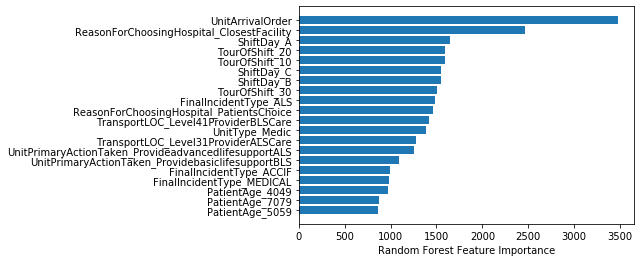

In [265]:
sorted_idx = lgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-20:]], lgb.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")

In [266]:
accuracy_score(y_train, y_train_pred), f1_score(y_train, y_train_pred, average='weighted')

(0.7130509286092281, 0.7152509756129025)

In [267]:
accuracy_score(y_test,y_test_pred), f1_score(y_test, y_test_pred, average='weighted')

(0.6955018521785147, 0.7013008927088209)

In [271]:
prob = lgb.predict_proba(X)
pred = lgb.predict(X)

In [282]:
import numpy as np

In [287]:
incidentpatientunitsfacilitiesmerge["model_probability"] = np.max(prob, axis=1)
incidentpatientunitsfacilitiesmerge["model_prediction"] = pred

In [383]:
incidentpatientunitsfacilitiesmerge["result"] = incidentpatientunitsfacilitiesmerge.TransportUnitID != incidentpatientunitsfacilitiesmerge.model_prediction

In [385]:
incidentpatientunitsfacilitiesmerge["result"].value_counts()

True    283450
Name: result, dtype: int64

In [330]:
incidentpatientunitsfacilitiesmerge.to_excel("dataset/model_predictions.xlsx", index=False)

## Analyze Data

In [20]:
import pandas as pd

In [21]:
incidentpatientunitsfacilitiesmerge = pd.read_excel("dataset/model_predictions.xlsx")
incidentpatientunitsfacilitiesmerge.shape

(127624, 19)

In [22]:
feature = "ReasonForChoosingHospital"
confidence_threshold = 0.9

In [23]:
def analyze_feature(df:pd.DataFrame, feature:str, confidence_threshold: float=0.9, min_records:int=10):
    t1 = df[feature].value_counts()
    mismatch = df[df.TransportHospitalCode != df.model_prediction]
    t2 = mismatch[mismatch.model_probability >= confidence_threshold][feature].value_counts()
    t3 = pd.concat([t1, t2], axis=1).reset_index()
    t3.columns = [feature, "total_count", "mismatch_count"]
    t3 = t3[t3.total_count>= min_records]
    t3["percentage_of_mismatch"] = (t3.mismatch_count / t3.total_count )*100
    return t3.sort_values("percentage_of_mismatch", ascending=False)

In [9]:
analyze_feature(incidentpatientunitsfacilitiesmerge, "ReasonForChoosingHospital")

,ReasonForChoosingHospital,total_count,mismatch_count,percentage_of_mismatch
47,"Patient's Physician's Choice,Family Choice",60,2.0,30.0
61,"Patient's Choice,Protocol,Closest Facility",28,1.0,28.0
37,"Specialty Center (Trauma, STEMI, Stroke),Protocol",104,4.0,26.0
62,"Specialty Center (Trauma, STEMI, Stroke),Close...",26,1.0,26.0
64,"Patient's Choice,Family Choice,Specialty Cente...",25,1.0,25.0
...,...,...,...,...
84,"Closest Facility,Patient's Choice,Family Choic...",14,NaN,NaN
85,"Closest Facility,Specialty Center (Trauma, STE...",14,NaN,NaN
86,"Patient's Choice,Diversion",13,NaN,NaN
90,"Specialty Center (Trauma, STEMI, Stroke),Close...",12,NaN,NaN


In [12]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.ReasonForChoosingHospital== "Patient's Choice,Family Choice"], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
1,Respiratory - Acute Distress/ Breathing Diffic...,172,131.0,76.162791
0,Weakness (R53.1),177,132.0,74.576271
2,Syncope - Syncopal/Fainting Episode (or Near) ...,108,78.0,72.222222


In [13]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.ReasonForChoosingHospital== "Patient's Choice,Family Choice"], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
1,Respiratory - Acute Distress/ Breathing Diffic...,172,131.0,76.162791
0,Weakness (R53.1),177,132.0,74.576271
2,Syncope - Syncopal/Fainting Episode (or Near) ...,108,78.0,72.222222


In [18]:
analyze_feature(incidentpatientunitsfacilitiesmerge, "TransportUnitID")

,TransportUnitID,total_count,mismatch_count,percentage_of_mismatch
2,404,7869,431,18.257541
21,425,9374,681,13.765051
37,442,4593,366,12.549180
5,409,15743,1345,11.704833
4,408,17531,1529,11.465664
12,416,1599,146,10.952055
10,414,7584,701,10.818830
19,423,6007,565,10.631858
0,401,6754,680,9.932353
20,424,6900,697,9.899570


In [17]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== 404], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
19,Abuse of Alcohol (ETOH) (F10.9),119,39.0,32.773109
25,Injury - Hip (S79.91),106,18.0,16.981132
14,Injury - Neck (S19.9),142,16.0,11.267606
23,Pain - Not Elsewhere Mentioned Sudden Onset (G...,108,12.0,11.111111
17,CV - Hypertension (I10),130,13.0,10.000000
2,GI/GU - Abdominal Pain/Problem (R10.84),311,30.0,9.646302
18,Fever (R50.9),126,9.0,7.142857
13,GI/GU - Nausea (With Vomiting) (R11.2),143,9.0,6.293706
3,Weakness (R53.1),307,19.0,6.188925
1,Respiratory - Acute Distress/ Breathing Diffic...,336,18.0,5.357143


In [382]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== "415"], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
19,Injury - Not Otherwise Listed (T14.90),114,5.0,22.800000
17,CV - Cardiac Arrest (I46.9),130,10.0,13.000000
7,Injury - Neck (S19.9),182,18.0,10.111111
12,Pain - Back (Non-traumatic) (M54.9),149,17.0,8.764706
4,Neuro - Altered Mental Status / Level of Consc...,253,30.0,8.433333
14,Malaise (R53.81),143,19.0,7.526316
2,Syncope - Syncopal/Fainting Episode (or Near) ...,296,48.0,6.166667
9,CV - Chest Pain - Angina (I20.0),169,30.0,5.633333
0,Respiratory - Acute Distress/ Breathing Diffic...,342,62.0,5.516129
1,Pain - Not Elsewhere Mentioned Sudden Onset (G...,339,69.0,4.913043


In [16]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== "415"], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

D:\Softwares\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch


In [15]:
incidentpatientunitsfacilitiesmerge

,TransportUnitID,TransportLOC,TransportHospitalCode,ReasonForChoosingHospital,PatientAge,PrimaryImpression,PatientDisposition,TransportUnitLOC,UnitPrimaryActionTaken,UnitStation,UnitType,UnitArrivalOrder,ShiftDay,TourOfShift,IncidentFirstDue,FinalIncidentType,model_probability,model_prediction,Mismatch
0,401,Level 3: 1 Provider (ALS Care),3,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),Treated & Transported,ALS-Paramedic,Provide manpower,1,Engine,2,B,1.0,1,ALS,1.000000,11,True
1,401,Level 3: 1 Provider (ALS Care),3,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),Treated & Transported,ALS-Paramedic,Provide advanced life support (ALS),1,Medic,1,B,1.0,1,ALS,1.000000,11,True
2,401,Level 4: 1 Provider (BLS Care),3,Patient's Choice,80 - 89,EENT - Eye Pain (Non-traumatic) (H57.10),Treated & Transported,ALS-Paramedic,Provide advanced life support (ALS),1,Medic,1,A,3.0,1,BLS,0.613191,3,False
3,401,Level 4: 1 Provider (BLS Care),16,Closest Facility,40 - 49,Injury - Foot (S99.92),Treated & Transported,ALS-Paramedic,Provide manpower,1,Engine,1,B,2.0,1,BLS,0.691172,16,False
4,401,Level 4: 1 Provider (BLS Care),16,Closest Facility,40 - 49,Injury - Foot (S99.92),Treated & Transported,ALS-Paramedic,Provide advanced life support (ALS),1,Medic,2,B,2.0,1,BLS,0.690932,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283445,429,Level 4: 1 Provider (BLS Care),16,"Closest Facility,Family Choice",80 - 89,Injury - Lower leg (S89.9),Treated & Transported,ALS-Paramedic,"Emergency medical services, other",28,Engine,1,C,2.0,1,MEDICAL,0.917983,16,False
283446,429,Level 4: 1 Provider (BLS Care),16,"Closest Facility,Family Choice",80 - 89,Injury - Lower leg (S89.9),Treated & Transported,ALS-Paramedic,Provide basic life support (BLS),29,Medic,2,C,2.0,1,MEDICAL,1.000000,3,True
283447,429,Level 2: 2 Providers (ALS Care),16,Closest Facility,2021-10-19 00:00:00,Neuro - Altered Mental Status / Level of Consc...,Treated & Transported,ALS-Paramedic,Provide advanced life support (ALS),1,Engine,1,A,1.0,1,MEDICAL,0.914441,16,False
283448,429,Level 2: 2 Providers (ALS Care),16,Closest Facility,2021-10-19 00:00:00,Neuro - Altered Mental Status / Level of Consc...,Treated & Transported,ALS-Paramedic,Cancelled en route,13,Engine,0,A,1.0,1,MEDICAL,0.999853,16,False


In [371]:
analyze_feature(incidentpatientunitsfacilitiesmerge[(incidentpatientunitsfacilitiesmerge.TransportUnitID == "415")],
               "TransportHospitalCode")

,original,mismatch,percentage_of_mismatch
36,34,22.0,0.647059
3,15,7.0,0.466667
95,1531,435.0,0.284128
16,453,122.0,0.269316
11,4921,1250.0,0.254013
59,25,5.0,0.200000


In [360]:
incidentpatientunitsfacilitiesmerge.head(1)

,TransportUnitID,TransportLOC,TransportHospitalCode,ReasonForChoosingHospital,PatientAge,PrimaryImpression,PatientDisposition,TransportUnitLOC,UnitPrimaryActionTaken,UnitStation,UnitType,UnitArrivalOrder,ShiftDay,TourOfShift,IncidentFirstDue,FinalIncidentType,model_probability,model_prediction
0,401,Level 3: 1 Provider (ALS Care),3,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),Treated & Transported,ALS-Paramedic,Provide manpower,1,Engine,2,B,1.0,1.0,ALS,1.0,11


In [12]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== "415"], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

D:\Softwares\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch


In [13]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== "405"], 
                                                    "PrimaryImpression",
                                                    0.5)

D:\Softwares\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
